In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy.random import multivariate_normal
from IPython.display import HTML
import random

## Playing with Gaussian processes
### by Marian Farah

### First, let's talk about functions. 

A function is a mathematical object that, when given an input, produces an output. We write,

$\color{blue}{f\colon x\to y = f(x)}$

A function can also take multiple inputs and return an output.



### A GP is a distribution over functions of one or more inputs. 

<br>
<p style="color:blue;">
\begin{equation*}
f(x) \;\sim \; \mathcal{GP} \,(\,\mu(x),\, K(x, x’)\,)
\end{equation*}
</p>

- The $\color{blue}{'}$ indicates transpose. 
- $\color{blue}{\mu(x)}$ is the mean function, and $\color{blue}{K(x, x’)}$  is the covariance function. 
- Yup; the parameters of a GP are functions.


Consider for now one input variable $\color{blue}x$ that takes values over the real number line $\color{blue}{\mathbb{R}}$,

\begin{equation*}
\color{blue}{
x =
\begin{pmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
\vdots  \\
\end{pmatrix}}
\;\;
\end{equation*}

A <b>mean function</b> can have its own parameters. Examples of the mean function include,

- $\color{blue}{\mu(x) = 0}$
- $\color{blue}{\mu(x) = a + b x}$
- $\color{blue}{\mu(x) = c + x sin(x)}$
- <p style="color:blue;"> etc. </p>


<br>  
<b>A covariance function</b> (must be positive semidefinite) generates the covariance matrix, with elements $\color{blue}{K(x_i, x_j)}$.

A popular covariance function is the exponential (also called Gaussian) function. It depends on the (squared) distance between input values,

\begin{equation*}
\color{blue}{
K(x_i, x_j) = \sigma^2 \exp\left(-\frac{(x_i- x_j)^2}{2\ell^2}\right)}
\end{equation*}

$\color{blue}{\sigma^2}$ is the variance parameter. $\color{blue}{\ell}$ is the “correlation decay” parameter. 


**Ok, but how does that work?**

Assume we have $\color{blue}n$ observations of a real-world process, with the following input (aka feature, independent variable) and response.

\begin{equation*}
\color{blue}{
x =
\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots  \\
x_{n}
\end{pmatrix}}
\;\;
\text{and}
\;\;
\color{blue}{
y =
\begin{pmatrix}
y_{1} \\
y_{2} \\
\vdots  \\
y_{n}
\end{pmatrix}}
\;\;
\end{equation*}

- Assume we don’t know the functional form of the relationship between $\color{blue}{x}$ and $\color{blue}{y}$. Thus, $\color{blue}{f(x)}$ is unkown. 
- If we model that function using a Gaussian process, then the vector of observations $\color{blue}{y = (y_, \dots, y_n)'}$ has a multivariate normal distribution. 
<p><small>
\begin{equation*}
\color{blue}{
\begin{pmatrix}
y_{1} \\
y_{2} \\
\vdots  \\
y_{n}
\end{pmatrix}
\;
\sim
\;
\mathcal N_n \left(
\;
\mu_x =
\begin{pmatrix}
\mu(x_{1}) \\
\mu(x_{2}) \\
\vdots  \\
\mu(x_{n})
\end{pmatrix}
\;,
\Sigma = 
\begin{pmatrix}
K(x_1, x_1)  & K(x_1, x_2)  & \cdots & K(x_1, x_n) \\
K(x_2, x_1) & K(x_2, x_2) & \cdots & K(x_2, x_n) \\
\vdots  & \vdots  & \ddots & \vdots  \\
K(x_n, x_1) & K(x_n, x_2) & \cdots & K(x_n, x_n)
\end{pmatrix}
\;
\right)}
\end{equation*}
</small></p>

<br>
<b>What about multiple inputs? </b>

\begin{equation*}
\color{blue}{
X =
\begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,m} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{n,1} & x_{n,m} & \cdots & x_{n,m}
\end{pmatrix}}
\;\;
\text{and}
\;\;
\color{blue}{
y =
\begin{pmatrix}
y_{1} \\
y_{2} \\
\vdots  \\
y_{n}
\end{pmatrix}}
\;\;
\end{equation*}

The covariance function becomes,
\begin{equation*}
\color{blue}{
K(x_i, x_j) = \sigma^2 \exp\left(-\sum_{k=1}^m\frac{\left(x_{ik}- x_{jk}\right)^2}{2\ell_k^2}\right)}
\end{equation*}

## Let's play with GPs!

In [2]:
def squared_distance_func(x):
    '''Generates the squared distance matrix for points in 1d vector x.
    '''
    n = len(x)
    D = np.empty([n, n])
    for i in range(n):
        for j in range(n):
            D[i,j] = (x[i] - x[j])**2
    return D

In [3]:
def get_y_gp(x, mu, sigma, ell, n_curves=1):
    '''Generates n_curves from a Gaussian process with one input 
    and a constant mean.
    '''
    D = squared_distance_func(x)
    # constant mean
    y = multivariate_normal(np.repeat(mu, len(x)),
                            np.multiply(sigma**2, np.exp(-.5*D/ell**2)),
                            n_curves)
    plt.figure(figsize=(12, 6))
    plt.plot(x, y.T)
    plt.axhline(mu, color='k', linestyle=':')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title(f'$\mu$={mu}, $\sigma^2$={sigma**2}, $\ell$={ell}',
              fontsize=20)
    return y

In [4]:
# Place a grid on x
x = np.arange(-5, 5, .05)
n = len(x)
print(x.shape)

# Generate the distance matrix, must be n x n
D = squared_distance_func(x)
print(D.shape)

(200,)
(200, 200)


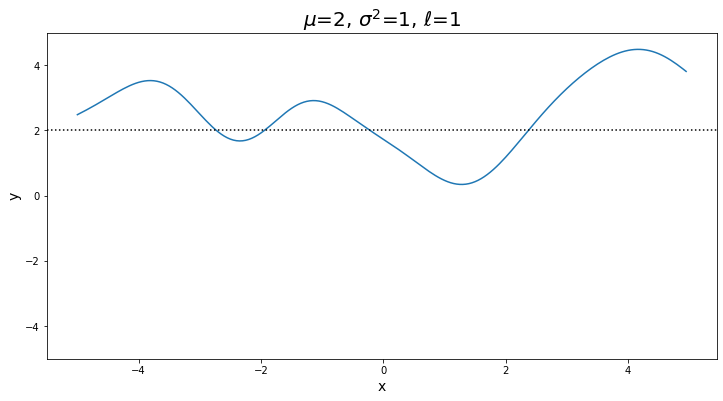

In [5]:
# Generate one curve
np.random.seed(seed=2)
mu, sigma, ell = 2, 1, 1
y = get_y_gp(x, mu, sigma, ell, n_curves=1)
plt.ylim(-5, 5);

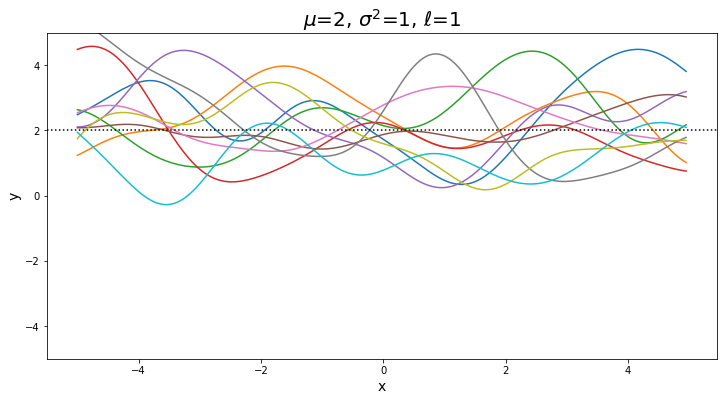

In [6]:
# Generate 10 curves. Notice the values of each curve change smoothly.
np.random.seed(seed=2)
mu, sigma, ell = 2, 1, 1
y = get_y_gp(x, mu, sigma, ell, n_curves=10)
plt.ylim(-5, 5);

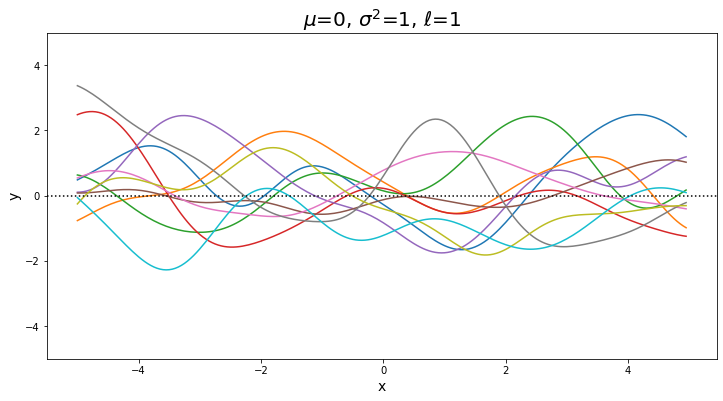

In [7]:
# Change the value of mu to 0. Notice the vertical shift.
np.random.seed(seed=2)
mu, sigma, ell = 0, 1, 1
y = get_y_gp(x, mu, sigma, ell, n_curves=10)
plt.ylim(-5, 5);

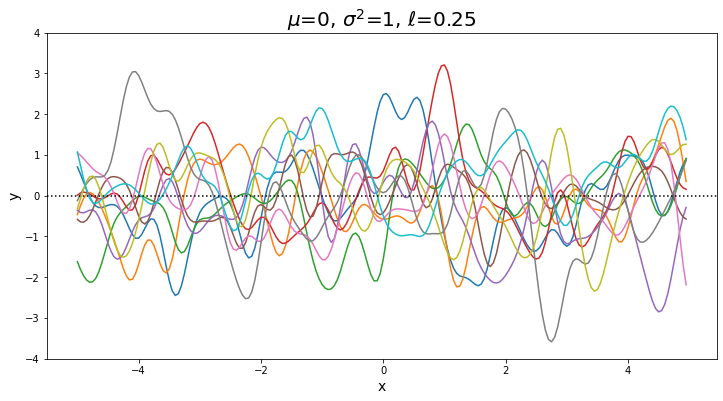

In [8]:
# Decrease the value of ell to 0.25. The curves change values more rapidly.
np.random.seed(seed=2)
mu, sigma, ell = 0, 1, .25
y = get_y_gp(x, mu, sigma, ell, n_curves=10)
plt.ylim(-4, 4);

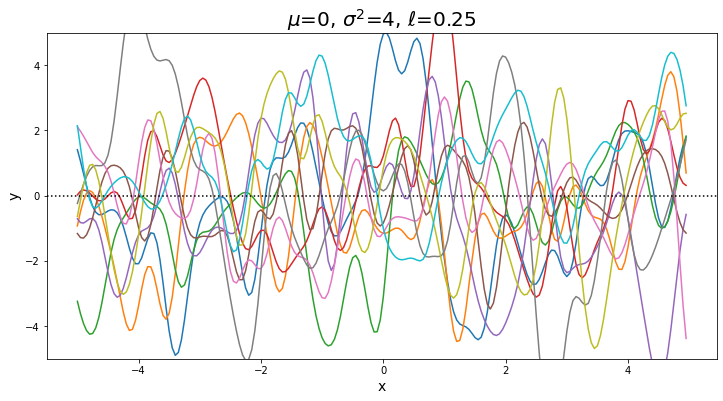

In [9]:
# Incease the value of sigma to 2. The amplitudes of the curves become wider.
np.random.seed(seed=2)
mu, sigma, ell = 0, 2, .25
y = get_y_gp(x, mu, sigma, ell, n_curves=10)
plt.ylim(-5, 5);

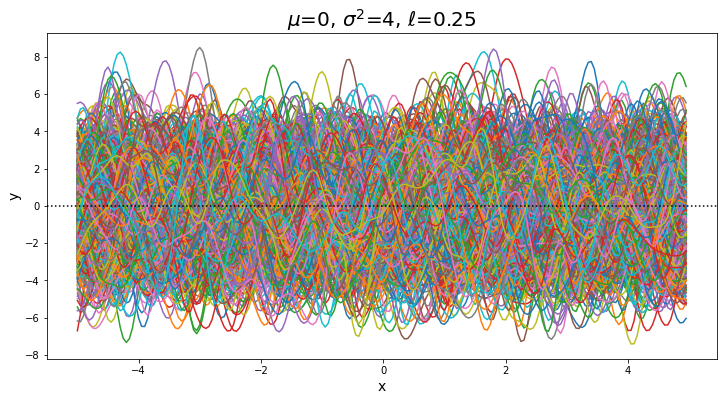

In [10]:
# Generate 1000 curves. sigma^2 controls the variance of the process. 
np.random.seed(seed=2)
mu, sigma, ell = 0, 2, .25
y = get_y_gp(x, mu, sigma, ell, n_curves=1000)

<b>Great GP resources:</b>

- Regression and Classification Using Gaussian Process Priors by Radford Neal https://www.cs.toronto.edu/~radford/ftp/val6gp.pdf
- Gaussian Processes for Machine Learning by Carl Edward Rasmussen and Chris Williams http://www.gaussianprocess.org/gpml/


